In [9]:
import os

import matplotlib.pyplot as pl
#import cartopy as cp
import geopandas as gp

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

#from mpl_toolkits.basemap import Basemap
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [10]:
#pl.rcParams['mathtext.default'] = 'regular'

# location of cartopy background images:
os.environ["CARTOPY_USER_BACKGROUNDS"] = "background_maps"

In [76]:
xsection_file = '../data/xsections.shp'

proj = ccrs.PlateCarree()
extent = [65, 100, 21.0, 35.0]

In [77]:
shp = gp.read_file(xsection_file)

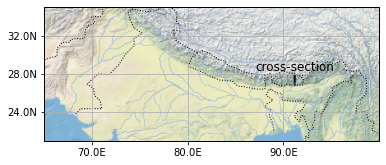

In [97]:
fig = pl.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 1, 1, projection=proj)

ax.set_extent(extent, crs=proj)              

#ax.stock_img()             
#ax.add_feature(cfeature.LAND)

#leg_img = ax.add_image(request, 4, cmap='gray')
#ax.add_image(stamen_terrain, 8)

ax.background_img(name='NE', resolution='low')

# add xsection location
ax.add_geometries(shp.geometry, crs=proj, facecolor='none', edgecolor='black', lw=2.0)
    
#
RIVERS_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                             edgecolor=cfeature.COLORS['water'],
                             facecolor='none', lw=0.5)
ax.add_feature(RIVERS_10m, label='rivers', zorder=2)

#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.COASTLINE, lw=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

import matplotlib.ticker
mt = matplotlib.ticker.MaxNLocator(4)

gl = ax.gridlines(xlocs=mt, ylocs=mt)#, draw_labels=True)

#gl.draw_labels()

#xticks = [87, 90, 93, 96]
#yticks = [22.5, 25.0, 27.5]
xticks = [70, 80, 90]
yticks = [24, 28.0, 32.0]

ax.set_xticks(xticks, crs=proj)
ax.set_yticks(yticks, crs=proj)
lon_formatter = LongitudeFormatter(number_format='.1f',
                                   degree_symbol='',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',
                                  degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

xy = shp.centroid.geometry[0].coords[:][0]
ax.annotate('cross-section', xy, (xy[0], xy[1] + 1), fontsize='large', ha='center')

fig.savefig('fig/inset_map.svg')

In [89]:
shp.centroid.geometry[0].coords[:]

[(91.20369043620535, 27.348767435139237)]

In [83]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(text, xy, *args, **kwargs) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.  *s* is a deprecated synonym for this
        parameter.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'
    
        The coordinat